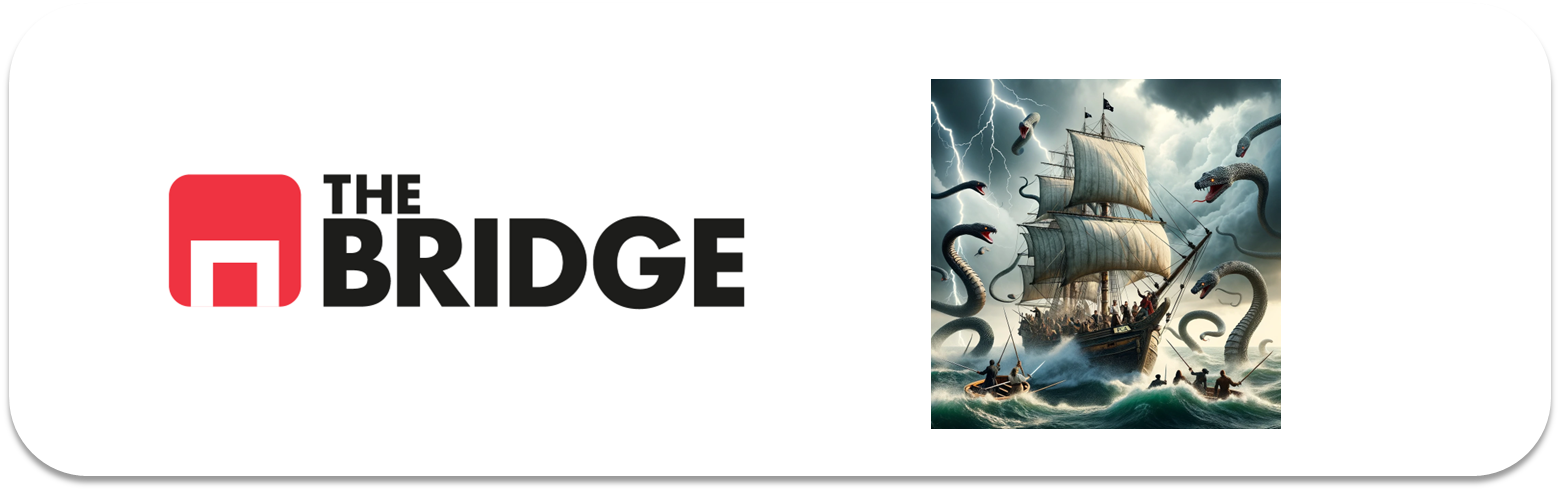

## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técncias de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score





In [8]:
df = pd.read_csv("./data/credit_npo.csv")
df

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12532,0,0.197116,59,0,0.290216,5140.0,6,0,1,0,0.0
12533,0,0.036726,62,0,0.884985,5833.0,12,0,1,0,0.0
12534,0,0.120313,49,0,0.577676,6333.0,7,0,2,0,2.0
12535,0,0.252566,63,0,0.037640,14000.0,9,0,0,0,1.0


### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificació sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selecció de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


### APARTADO 1

In [9]:
# Eliminar filas con valores nulos
df = df.dropna()

# Convertir las columnas "NumberOf..." a categóricas (2-3 niveles)
df['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=[-1, 0, 2, float('inf')], labels=['0', '1-2', '3+'])
df['NumberOfTimes90DaysLate'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=[-1, 0, 2, float('inf')], labels=['0', '1-2', '3+'])
df['NumberOfTime30-59DaysPastDueNotWorse'] = df['NumberOfTime30-59DaysPastDueNotWorse'].map({'0': 0, '1-2': 1, '3+': 2})
df['NumberOfTimes90DaysLate'] = df['NumberOfTimes90DaysLate'].map({'0': 0, '1-2': 1, '3+': 2})

# Separar X e y (será útil más adelante)
X = df.drop('SeriousDlqin2yrs', axis=1)
y = df['SeriousDlqin2yrs']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Guillem\AppData\Local\Temp\ipykernel_9900\3660479864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberOfTime30-59DaysPastDueNotWorse'] = pd.cut(df['NumberOfTime30-59DaysPastDueNotWorse'], bins=[-1, 0, 2, float('inf')], labels=['0', '1-2', '3+'])
C:\Users\Guillem\AppData\Local\Temp\ipykernel_9900\3660479864.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberOfTimes90DaysLate'] = pd.cut(df['NumberOfTimes90DaysLate'], bins=[-1, 0, 2, float('inf')], labels=['0', '1-2', '3+'])
C:

### APARTADO 2

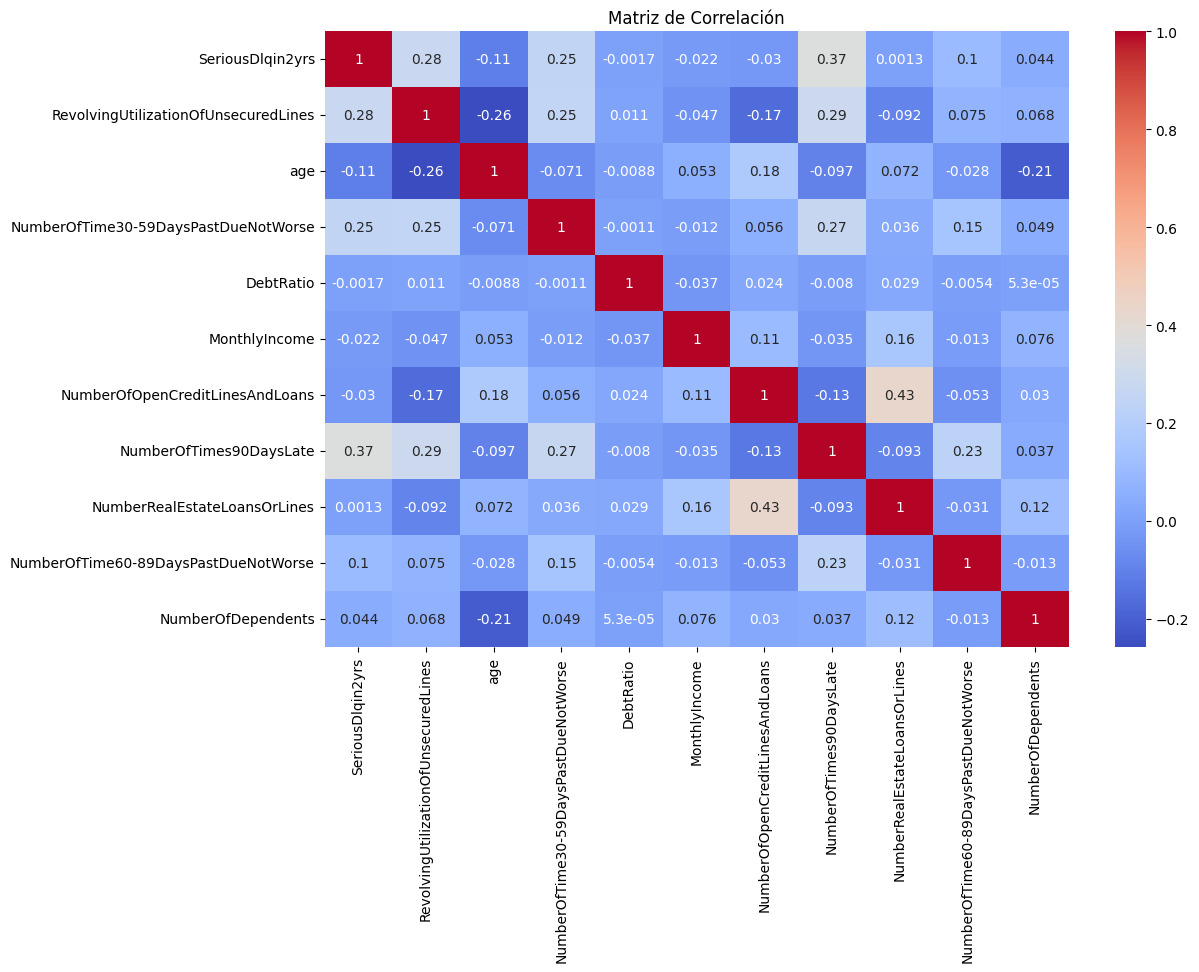

C:\Users\Guillem\AppData\Local\Temp\ipykernel_9900\3228358471.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=to_drop, inplace=True)


In [10]:

# Lanzamos matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Se eliminan features altamente correlacionadas entre ellas (umbral > 0.8)
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
df.drop(columns=to_drop, inplace=True)


In [12]:

# Seleccionar las que consideramos las mejores características numéricas (debido a las correlaciones realizadas)
num_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio', 'MonthlyIncome']
X_num = X_train[num_features]

# Utilizamos una prueba de hipótesis con ANOVA
selector = SelectKBest(score_func=f_classif, k=3)
X_num_selected = selector.fit_transform(X_num, y_train)
best_num_features = X_num.columns[selector.get_support()]
print('Mejores características numéricas:', best_num_features)


Mejores características numéricas: Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome'], dtype='object')


In [14]:

# Utilizamos Mutual Information 
cat_features = ['NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines']
X_cat = pd.get_dummies(X_train[cat_features])

# Escogemos las mejores features o variables categoricas
mi_scores = mutual_info_classif(X_cat, y_train)
mi_sorted = pd.Series(mi_scores, index=X_cat.columns).sort_values(ascending=False)
best_cat_features = mi_sorted.head(3).index.tolist()
print('Mejores características categóricas:', best_cat_features)


Mejores características categóricas: ['NumberOfTimes90DaysLate_0', 'NumberOfTime30-59DaysPastDueNotWorse_0', 'NumberOfTimes90DaysLate_1']


In [16]:

# Vamos a utilizar un RandomForest como modelo base
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Se seleccionan las mejores variables o features a partir de la importancia que tienen dentro del modelo
sfm = SelectFromModel(rf, threshold='mean')
sfm.fit(X_train, y_train)
best_sfm_features = X_train.columns[sfm.get_support()]
print('Mejores características según SelectFromModel:', best_sfm_features)


Mejores características según SelectFromModel: Index(['RevolvingUtilizationOfUnsecuredLines', 'age', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate'],
      dtype='object')


In [18]:

# Se utiliza un modelo de LogisticRegression de clasificador para RFE
lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X_train, y_train)

best_rfe_features = X_train.columns[rfe.get_support()]
print('Mejores características según RFE:', best_rfe_features)


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mejores características según RFE: Index(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate'],
      dtype='object')


In [22]:

# Usar RandomForestClassifier para SFS
sfs = SFS(rf, k_features=3, forward=True, floating=False, scoring='recall', cv=5)
sfs = sfs.fit(X_train, y_train)

best_sfs_features = list(sfs.k_feature_names_)
print('Mejores características según SFS:', best_sfs_features)


c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Guillem\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.wa

Mejores características según SFS: ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate']


### APARTADO 3

In [26]:

# Modelos a comparar
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'GradientBoosting': GradientBoostingClassifier()
}

# Listas de features de cada método
feature_sets = [best_num_features, best_cat_features, best_sfm_features, best_rfe_features, best_sfs_features]

# Evaluar cada modelo con validación cruzada en cada conjunto de features
for model_name, model in models.items():
    for i, features in enumerate(feature_sets):
        X_train_selected = X_train[features]
        scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='recall')
        print(f'{model_name}, Feature set {i+1}, Recall: {scores.mean()}')


RandomForest, Feature set 1, Recall: 0.07838915470494418


KeyError: "None of [Index(['NumberOfTimes90DaysLate_0', 'NumberOfTime30-59DaysPastDueNotWorse_0',\n       'NumberOfTimes90DaysLate_1'],\n      dtype='object')] are in the [columns]"

In [34]:


# Convertir variables categóricas a dummies
X_train_dummies = pd.get_dummies(X_train)

model = RandomForestClassifier()  
features = best_cat_features  
features_dummies = [col for col in X_train_dummies.columns if any(feature in col for feature in features)]

X_train_selected = X_train_dummies[features_dummies]  # Usamos el dataframe con dummies si aplica

scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='recall')

# RESULTADO PARA RANDOMFORESTCLASSIFIER
print(f'Recall promedio para {model.__class__.__name__}: {scores.mean()}')

model = LogisticRegression(max_iter=1000)  
features = best_cat_features  

features_dummies = [col for col in X_train_dummies.columns if any(feature in col for feature in features)]

X_train_selected = X_train_dummies[features_dummies]  

scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='recall')

# RESULTDO PARA LOGISTICREGRESSION
print(f'Recall promedio para {model.__class__.__name__}: {scores.mean()}')

model = GradientBoostingClassifier()  
features = best_cat_features  

features_dummies = [col for col in X_train_dummies.columns if any(feature in col for feature in features)]


X_train_selected = X_train_dummies[features_dummies]  

scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='recall')

# RESULTADO GRADIENTBOOSTING
print(f'Recall promedio para {model.__class__.__name__}: {scores.mean()}')


Recall promedio para RandomForestClassifier: 0.10865800865800868
Recall promedio para LogisticRegression: 0.23542948279790385
Recall promedio para GradientBoostingClassifier: 0.10865800865800868


**He probado de hacer el codigo con un bucle for para que me sacara todos los resultados de golpe y fuera un codigo mas eficiente, pero me ha dado error debido a que las variables categóricas no están correctamente convertidas en dummies.
Por ello lo he dejado cambiado y he ido haciendo modelo a modelo viendo el score que tenía individualmente en el codigo de la celda de justo arriba. 
Lo dejo constante aquí para los dos casos.**

### Apartado 4

In [27]:


# Selección del mejor modelo (supongamos que es RandomForest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='recall')
grid_search.fit(X_train[best_sfs_features], y_train)

print('Mejores hiperparámetros:', grid_search.best_params_)

# Evaluación final en el conjunto de prueba
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test[best_sfs_features], y_test)
print('Score en test:', test_score)


Mejores hiperparámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Score en test: 0.9060913705583756


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.